## Rei Campo
### Sub Analysis: Finding The Thresholds for Stable Circumbinary Orbits

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.sans-serif'] = 'stix'
from scipy import integrate
from celluloid import Camera
import gravSolve as gs
import plotter as p
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FFMpegWriter
from matplotlib.animation import FuncAnimation
from astropy import constants as const
from astropy import units as u

In [2]:
#units used: AU, Msun, yr
G = const.G.to('AU**3/Msun*yr**2').value
M1 = 100
M2 = 100
M3 = .001
e = 0.3300
a = 0.326


# kepler's laws
Mtot = M1 + M2
mu = M1 * M2 / Mtot
ell = np.sqrt(G * Mtot * a * (1.0 - e**2))
P = 2.0 * np.pi * np.sqrt(a**3 / (G * Mtot))

# set initial conditions correpsonding to apoapsis
rap = a * (1.0 + e)
vap = ell / rap

# positions and velocities of the two stars
a1 = rap * mu / M1
a2 = rap * mu / M2
v1 = vap * mu / M1
v2 = vap * mu / M2

Planet_Mtot = (M1 + M2) + M3
Planet_mu = (M1 + M2) * M3 / Planet_Mtot
Planet_ell = np.sqrt(G * Planet_Mtot * a * (1.0 - e**2))
Planet_P = 2.0 * np.pi * np.sqrt(a**3 / (G * Planet_Mtot))

Planet_vap = Planet_ell / rap

a3 = rap * Planet_mu / M3
v3 = Planet_vap * Planet_mu / M3

In [3]:
def body3(pos, p = 1, ϵ = 0.0001):
    body1Pos = [a1, 0, 0] #(x,y,z)
    body1Velo = [0, v1, 0] #(vx,vy,vz)

    body2Pos = [-a2, 0, 0] #(x,y,z)
    body2Velo = [0, v2, 0] #(vx,vy,vz)

    body3Pos = [pos, 0, 0]
    body3Velo = [0, v3, 0]

    mass = np.array([M1, M2, M3])
    pos = np.array([body1Pos, body2Pos, body3Pos]).flatten()
    velo = np.array([body1Velo, body2Velo, body3Velo]).flatten()
    v0 = np.array([pos, velo]).flatten()
    tarr = np.linspace(0.0, P * p, 1e3)
    result = integrate.odeint(gs.df_Nbody, v0, tarr, args = (mass, G, ϵ))
    return result, tarr

/Users/RachelCampo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


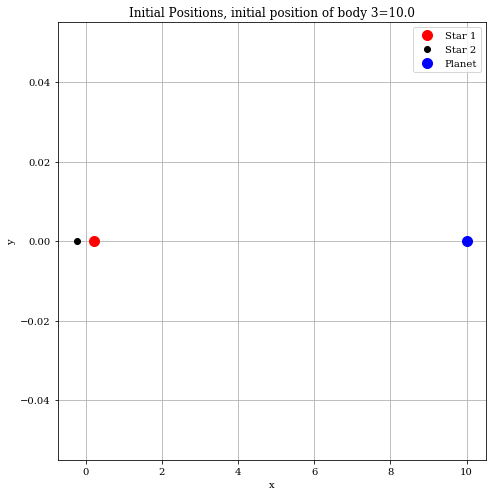

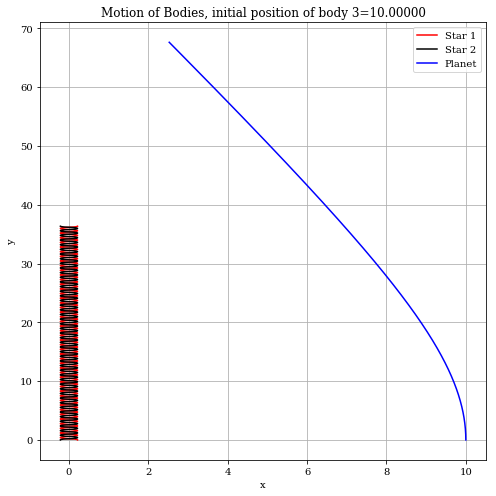

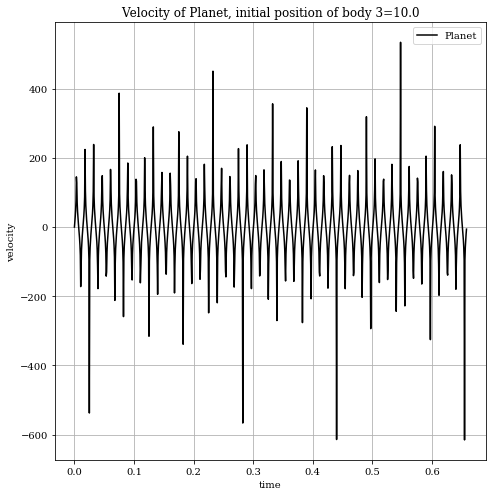

In [7]:
planet_position = 10
result, tarr = body3(planet_position, p = 50, ϵ = 0.01)
p.plotter(result, 1,1,1 , planet_position, proj = 0, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 2, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 4, tarr = tarr)

/Users/RachelCampo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


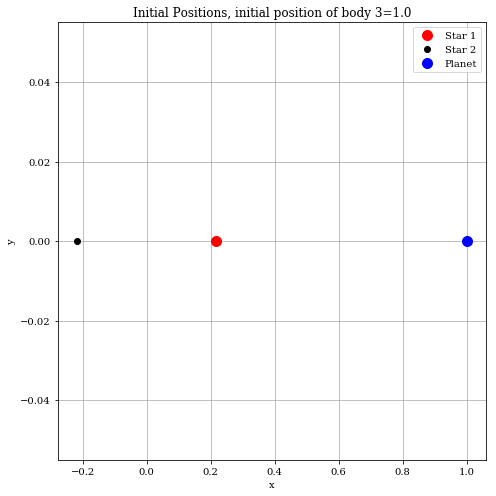

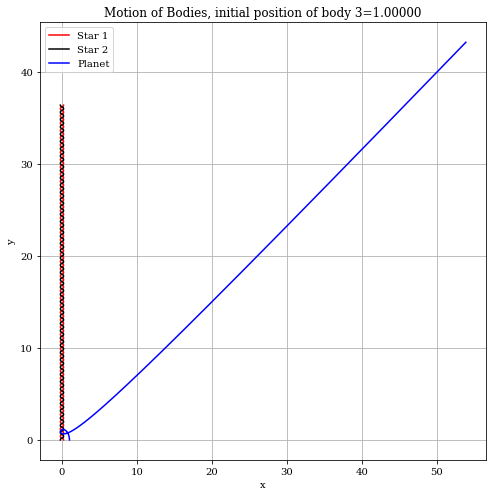

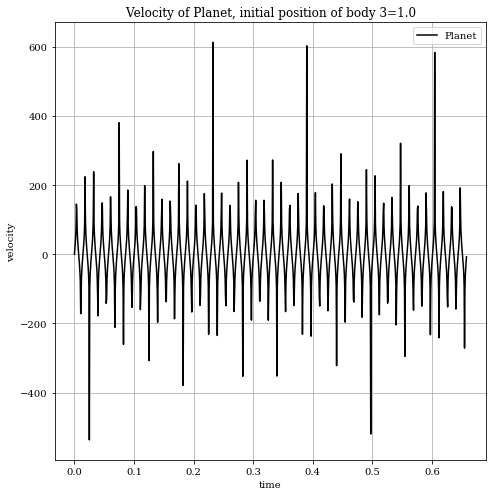

In [10]:
planet_position = 1
result, tarr = body3(planet_position, p = 50, ϵ = 0.01)
p.plotter(result, 1,1,1 , planet_position, proj = 0, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 2, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 4, tarr = tarr)

/Users/RachelCampo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


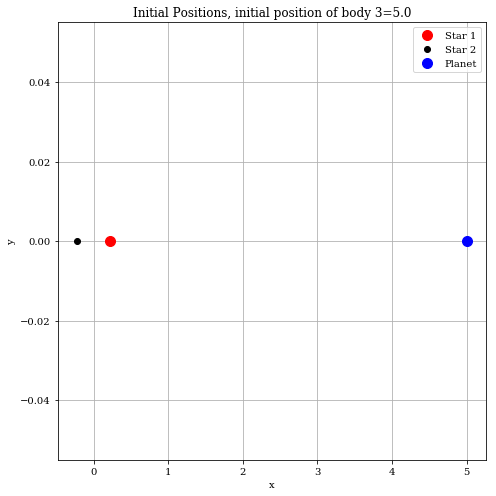

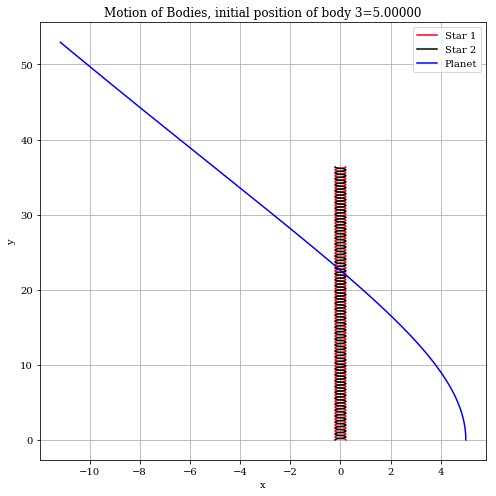

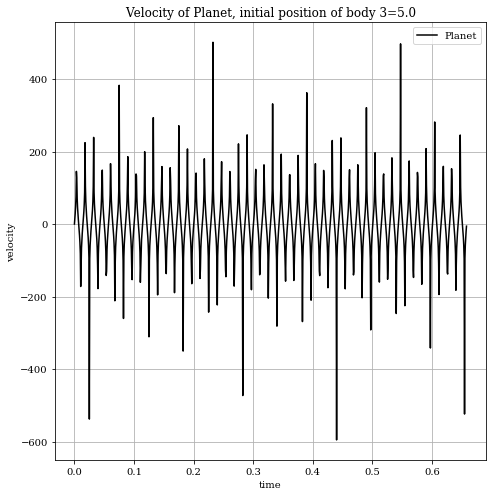

In [11]:
planet_position = 5
result, tarr = body3(planet_position, p = 50, ϵ = 0.01)
p.plotter(result, 1,1,1 , planet_position, proj = 0, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 2, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 4, tarr = tarr)

/Users/RachelCampo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


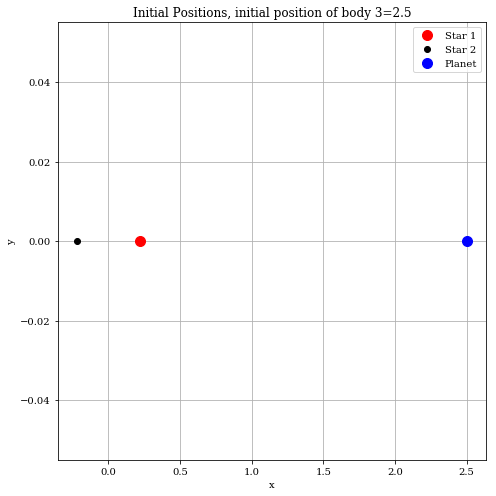

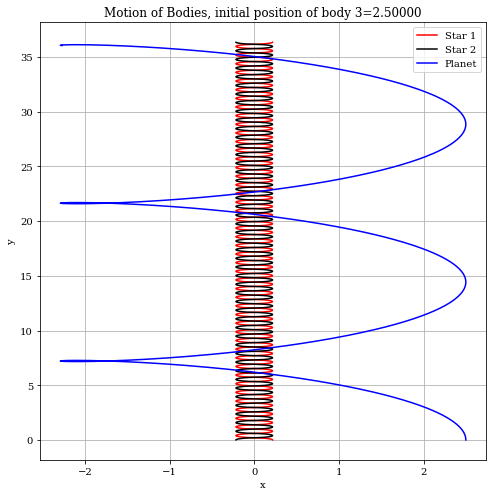

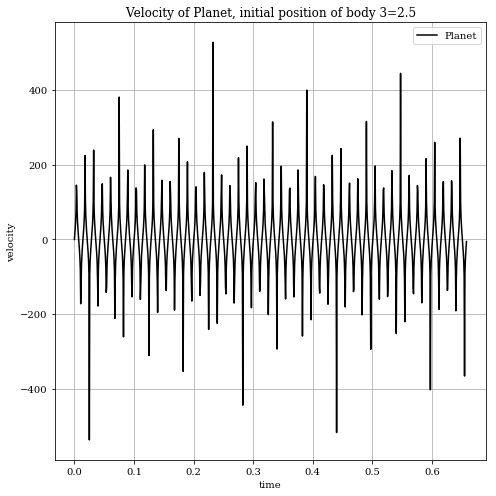

In [12]:
planet_position = 2.5
result, tarr = body3(planet_position, p = 50, ϵ = 0.01)
p.plotter(result, 1,1,1 , planet_position, proj = 0, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 2, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 4, tarr = tarr)

/Users/RachelCampo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


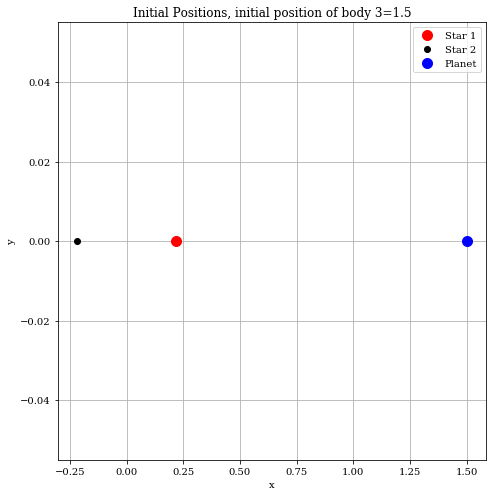

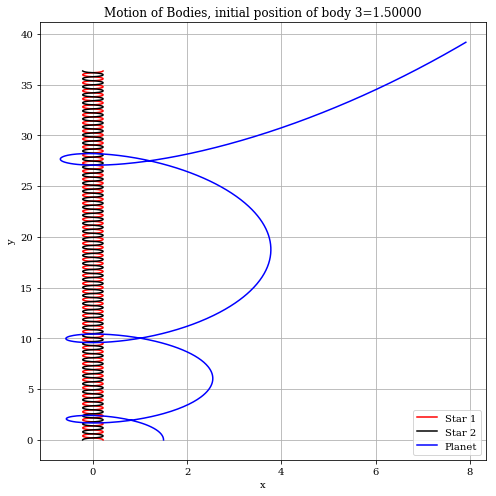

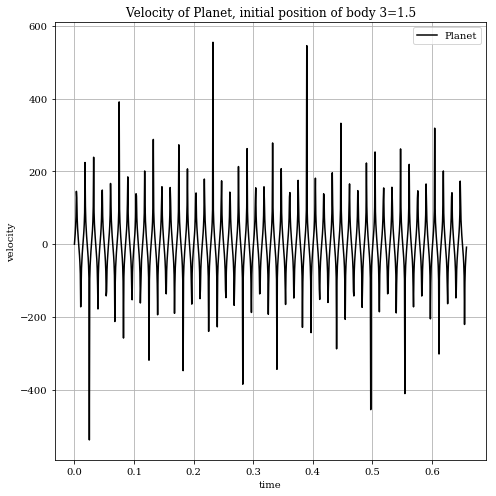

In [13]:
planet_position = 1.5
result, tarr = body3(planet_position, p = 50, ϵ = 0.01)
p.plotter(result, 1,1,1 , planet_position, proj = 0, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 2, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 4, tarr = tarr)

/Users/RachelCampo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


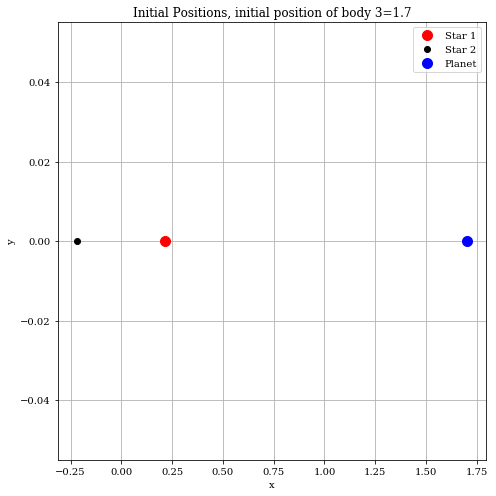

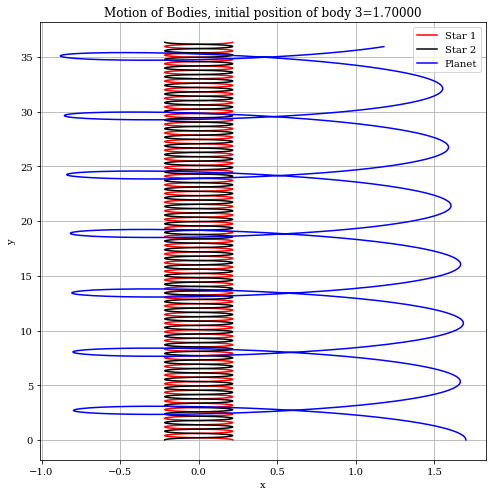

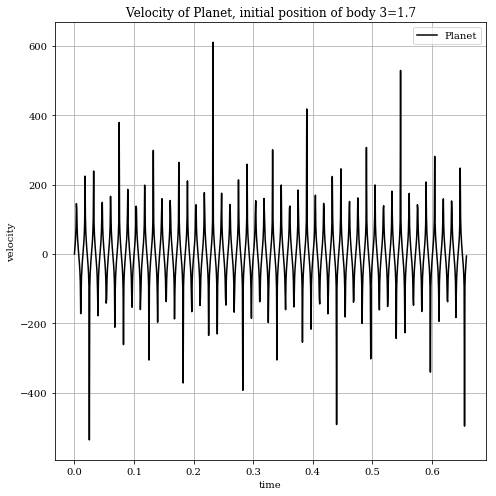

In [14]:
planet_position = 1.7
result, tarr = body3(planet_position, p = 50, ϵ = 0.01)
p.plotter(result, 1,1,1 , planet_position, proj = 0, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 2, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 4, tarr = tarr)

/Users/RachelCampo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


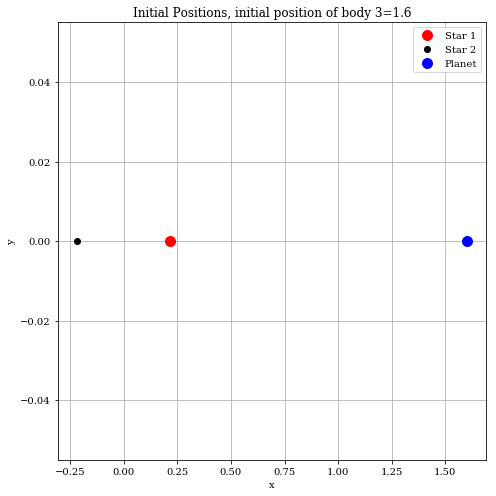

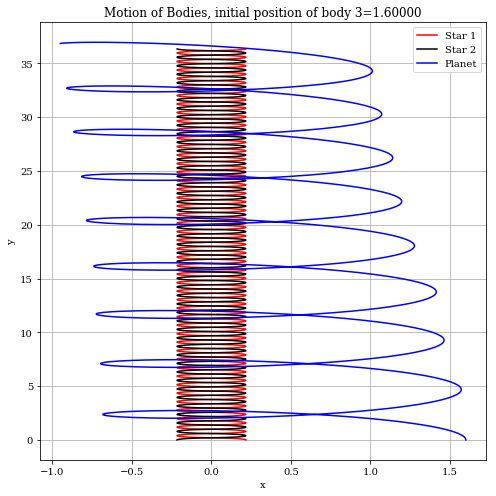

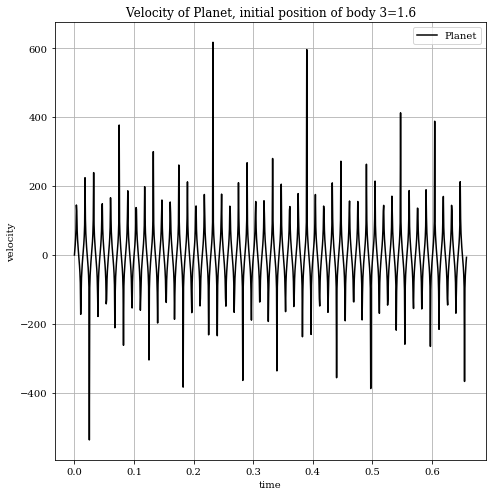

In [15]:
planet_position = 1.6
result, tarr = body3(planet_position, p = 50, ϵ = 0.01)
p.plotter(result, 1,1,1 , planet_position, proj = 0, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 2, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 4, tarr = tarr)